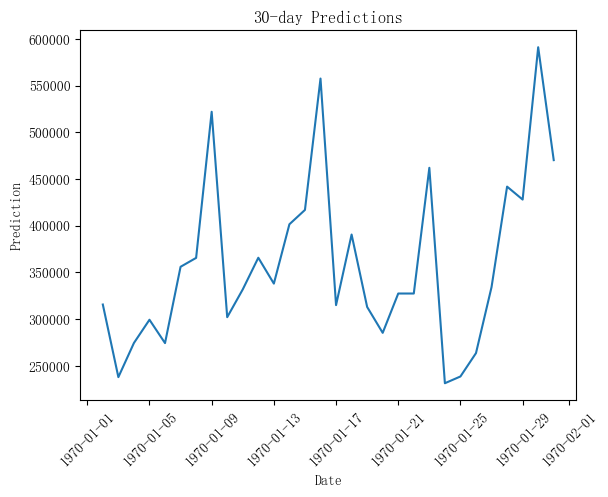

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
plt.rcParams['font.family'] = 'SimSun'
train_data = pd.read_csv('../newData.csv',encoding='gbk')

# 提取特征和目标变量
X_train = train_data[['月份', '日期', '星期几', '季节', '节假日']]
y_train = train_data['航线金额']

# 创建并训练GBDT模型
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# 生成未来30天的特征数据
start_date = pd.to_datetime(train_data['日期'].iloc[-1]) + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(days=29)
future_dates = pd.date_range(start=start_date, end=end_date)
future_features = pd.DataFrame({'月份': future_dates.month,
                                '日期': future_dates.day,
                                '星期几': future_dates.weekday,
                                '季节': future_dates.month % 12 // 3 + 1,
                                '节假日': 0})  # 假设未来30天无节假日

# 进行未来30天数据的预测
future_predictions = model.predict(future_features)

# 绘制折线图
plt.plot(future_dates, future_predictions)
plt.title('30-day Predictions')
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.xticks(rotation=45)
plt.show()